<a href="https://colab.research.google.com/github/Sonish-Maharjan-2014/Neural_Network/blob/master/sign_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,Input,Softmax,MaxPool2D,Flatten
from tensorflow.keras import Sequential
import plotly.express as px
import os
import cv2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
folder = os.listdir(f'/content/drive/MyDrive/data')
folder.sort(reverse=True)
number_of_record = len(folder)

In [44]:
encoded = {}
e=0
for i in folder:
  encoded[i] = e
  e+=1

In [ ]:
print(encoded,end=' ')

{'Z': 0, 'Y': 1, 'X': 2, 'W': 3, 'V': 4, 'U': 5, 'T': 6, 'S': 7, 'R': 8, 'Q': 9, 'P': 10, 'O': 11, 'N': 12, 'M': 13, 'L': 14, 'K': 15, 'J': 16, 'I': 17, 'H': 18, 'G': 19, 'F': 20, 'E': 21, 'D': 22, 'C': 23, 'B': 24, 'A': 25, '9': 26, '8': 27, '7': 28, '6': 29, '5': 30, '4': 31, '3': 32, '2': 33, '1': 34} 

In [ ]:
path = '/content/drive/MyDrive/data'
image_list = []
output_list = []
p = 0
for i in folder:
  filename = os.listdir(f'{path}/{i}')
  for j in filename:
    image_list.append(cv2.imread(f'{path}/{i}/{j}',0))
    output_list.append(p)
  p+=1

In [ ]:
image_array = np.array(image_list)
output_array = np.array(output_list)

In [ ]:
image_array.shape,output_array.shape

((42000, 128, 128), (42000,))

In [ ]:
k = image_array.reshape(-1,128*128)
k.shape

(42000, 16384)

In [ ]:
len(k[2])

16384

In [ ]:
# np.savetxt(f"/content/drive/MyDrive/array_data/image/image123.csv", k, delimiter=",")
# np.savetxt(f"/content/drive/MyDrive/array_data/image/label.csv", output_array, delimiter=",")


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/array_data/image/image.csv')
data.head()

In [ ]:
len(image_array),len(output_array)

(42000, 42000)

In [ ]:
layer_0 = Input(shape=(128,128,1))
layer_11 = Conv2D(filters=64,kernel_size = 3,activation = 'relu',padding = 'same',  kernel_initializer = 'he_normal')
layer_1 = MaxPool2D(pool_size=(2,2))

layer_21 = Conv2D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same',  kernel_initializer = 'he_normal')
layer_2 = MaxPool2D((2,2))

layer_31 = Conv2D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same',  kernel_initializer = 'he_normal')
layer_3 = MaxPool2D((2,2))

layer_41 = Conv2D(filters = 512,kernel_size = 3,activation = 'relu',padding = 'same',  kernel_initializer = 'he_normal')
layer_4 = MaxPool2D((2,2))

layer_5 = Flatten()

layer_6 = Dense(units=100,activation = 'relu')

layer_7 = Dense(units=50,activation = 'relu')

layer_8 = Dense(units=35, activation='softmax')

In [ ]:
model = Sequential([layer_0,layer_11,layer_1,layer_21,layer_2,layer_31,layer_3,layer_41
                    ,layer_4, layer_5, layer_6, layer_7,layer_8])

In [ ]:
adam = Adam(learning_rate=0.001)
scc = SparseCategoricalCrossentropy()
model.compile(optimizer=adam,
              loss=scc,
              metrics = ['accuracy']
              )

In [33]:
model.fit(image_array,output_array,epochs=3,batch_size = 32)

Epoch 1/3
1313/1313 [==============================] - 7405s 6s/step - loss: 2.8986 - accuracy: 0.9668
Epoch 2/3
1313/1313 [==============================] - 6678s 5s/step - loss: 1.2040e-05 - accuracy: 1.0000
Epoch 3/3
1313/1313 [==============================] - 5469s 4s/step - loss: 2.0586e-06 - accuracy: 1.0000


In [34]:
model.save('/content/drive/MyDrive/array_data/image/sign.h5')


In [3]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/array_data/image/sign.h5')


In [39]:
image_array[1].shape

(128, 128)

1/1 [==============================] - 0s 58ms/step


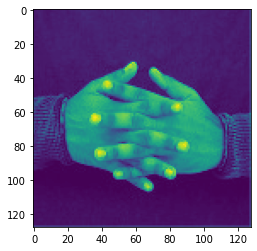

In [68]:
test = cv2.imread(f'/content/drive/MyDrive/data/W/1004.jpg',0)
# k=test.reshape(128,128,1)
test = cv2.resize(test,(128,128))
# plt.imshow(image_array[4])
# image_array[0],test
y_pred = new_model.predict(np.array([test]))
plt.imshow(test)


In [69]:
# predict = list(y_pred)

In [70]:
# encode_keys = list(encoded.keys())
# encode_keys

In [71]:
probab = y_pred.tolist()[0]
print("Predicted Digit =", encode_keys[probab.index(max(probab))])
# view_classify(img.view(1, 28, 28), 

Predicted Digit = W


In [67]:
probab

[6.8834509388282245e-15,
 4.374304805637892e-14,
 3.076676962640819e-20,
 2.3164172480296033e-27,
 2.82365787493459e-23,
 4.353565947435664e-20,
 0.01958906091749668,
 0.09751563519239426,
 2.7704100406984733e-13,
 8.07467905939154e-18,
 6.564818404598133e-14,
 1.5840861837250367e-15,
 9.026484093058068e-28,
 1.0273193022181451e-13,
 2.6577286717428296e-14,
 0.0,
 1.4787450900584332e-16,
 0.0021818429231643677,
 3.878320958720686e-20,
 1.2862657698018968e-17,
 2.761030607704301e-13,
 4.5487150599398994e-21,
 1.075713828683206e-36,
 1.9873198642272882e-09,
 2.0184465584313936e-16,
 4.2644812579513e-18,
 1.8311170295226344e-26,
 0.8807119727134705,
 1.9796513317515974e-09,
 1.4679167179565411e-06,
 4.101322682341615e-22,
 1.9943637992557472e-20,
 2.375522445419165e-09,
 1.6955716078407745e-30,
 3.805952081270547e-11]